Upload your sales_data.csv file:


Saving sales_data.csv to sales_data.csv
Original Data:
         Date  Sales
0  2023-01-01    100
1  2023-01-02    105
2  2023-01-03    110
3  2023-01-04    115
4  2023-01-05    120

--- Daily Forecast ---


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpi54touxc/2qorovec.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpi54touxc/89iryz9s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63154', 'data', 'file=/tmp/tmpi54touxc/2qorovec.json', 'init=/tmp/tmpi54touxc/89iryz9s.json', 'output', 'file=/tmp/tmpi54touxc/prophet_modelza53izgb/prophet_model-20250518132831.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:28:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:28:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


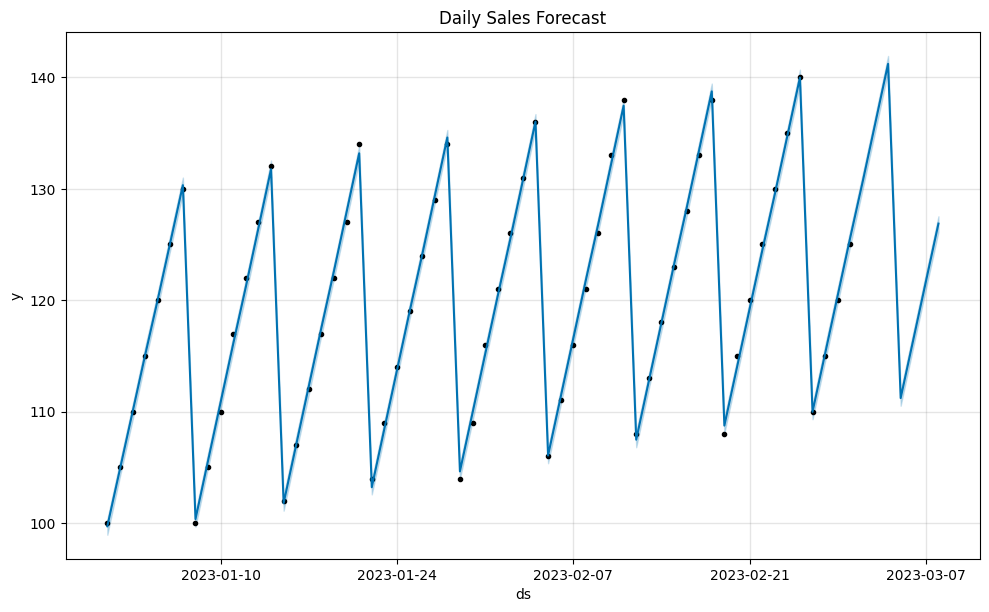

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpi54touxc/8ssf5evi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpi54touxc/rwstzbyv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22446', 'data', 'file=/tmp/tmpi54touxc/8ssf5evi.json', 'init=/tmp/tmpi54touxc/rwstzbyv.json', 'output', 'file=/tmp/tmpi54touxc/prophet_model4n7a7oju/prophet_model-20250518132832.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:28:32 - cmdstanpy - INFO - Chain [1] start processing
IN


--- Weekly Forecast ---


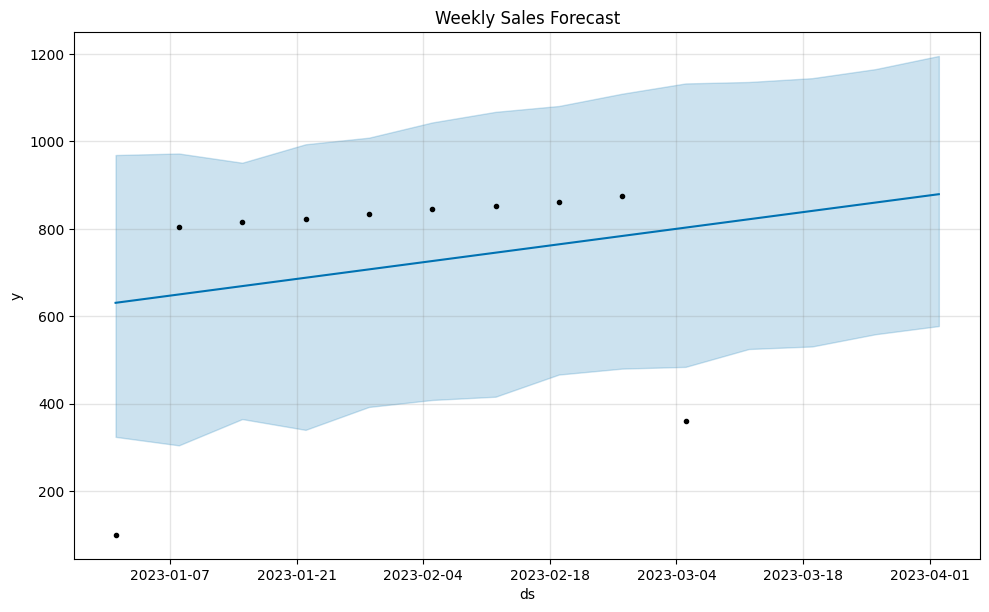

<ipython-input-1-5944a7a3fe2b>:55: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_df = monthly_df.set_index('ds').resample('M').sum().reset_index()
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 1.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpi54touxc/8ak_1lbe.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpi54touxc/3qnyx3c7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96430', 'data', 'file=/tmp/tmpi54touxc/8ak_1lbe.json', 'init=/tmp/tmpi54touxc/3qnyx3c7


--- Monthly Forecast ---


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


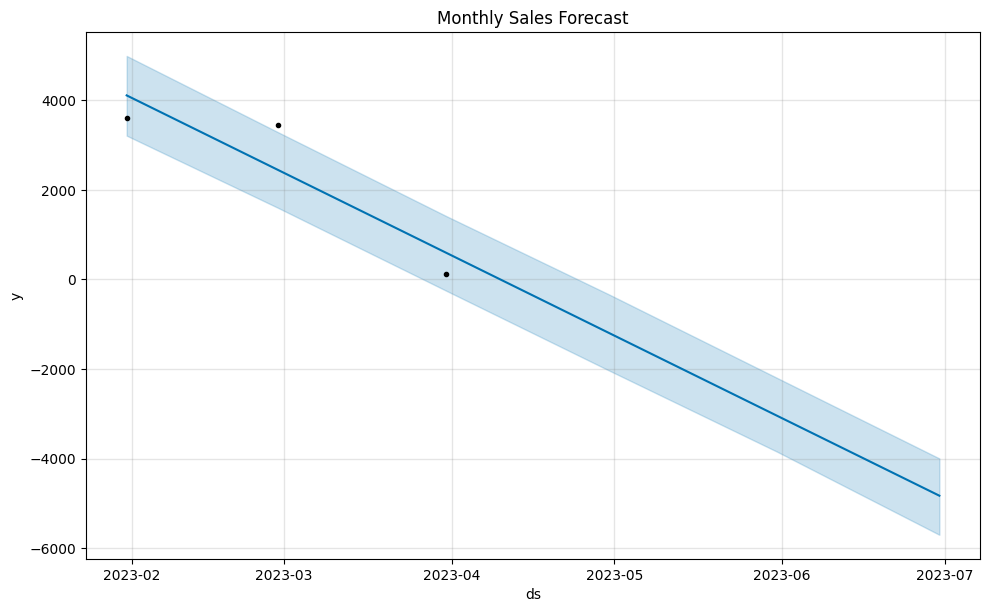

In [1]:
# Step 1: Upload CSV
from google.colab import files
import pandas as pd

print("Upload your sales_data.csv file:")
uploaded = files.upload()

# Step 2: Load data
df = pd.read_csv("sales_data.csv")
print("Original Data:")
print(df.head())

# Step 3: Convert date & rename columns for Prophet
df['Date'] = pd.to_datetime(df['Date'])
df = df.rename(columns={'Date': 'ds', 'Sales': 'y'})

# Step 4: Install Prophet
!pip install prophet

# Step 5: Import Prophet
from prophet import Prophet
import matplotlib.pyplot as plt
import seaborn as sns

# Step 6: DAILY FORECAST
print("\n--- Daily Forecast ---")
daily_model = Prophet()
daily_model.fit(df)
future_daily = daily_model.make_future_dataframe(periods=7)  # 7 days ahead
forecast_daily = daily_model.predict(future_daily)

# Plot daily forecast
fig1 = daily_model.plot(forecast_daily)
plt.title("Daily Sales Forecast")
plt.show()

# Step 7: WEEKLY AGGREGATION + FORECAST
print("\n--- Weekly Forecast ---")
weekly_df = df.copy()
weekly_df = weekly_df.set_index('ds').resample('W').sum().reset_index()

weekly_model = Prophet()
weekly_model.fit(weekly_df)
future_week = weekly_model.make_future_dataframe(periods=4, freq='W')  # 4 weeks ahead
forecast_week = weekly_model.predict(future_week)

# Plot weekly forecast
fig2 = weekly_model.plot(forecast_week)
plt.title("Weekly Sales Forecast")
plt.show()

# Step 8: MONTHLY AGGREGATION + FORECAST
print("\n--- Monthly Forecast ---")
monthly_df = df.copy()
monthly_df = monthly_df.set_index('ds').resample('M').sum().reset_index()

monthly_model = Prophet()
monthly_model.fit(monthly_df)
future_month = monthly_model.make_future_dataframe(periods=3, freq='M')  # 3 months ahead
forecast_month = monthly_model.predict(future_month)

# Plot monthly forecast
fig3 = monthly_model.plot(forecast_month)
plt.title("Monthly Sales Forecast")
plt.show()